# Import and Read

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

data = pd.read_csv("NetflixOriginals.csv",encoding='latin-1')
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


# First Look to Data


In [3]:
data.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [4]:
data.tail(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


# Data Visualization


## 1) In which language were the long-running films created according to the dataset?

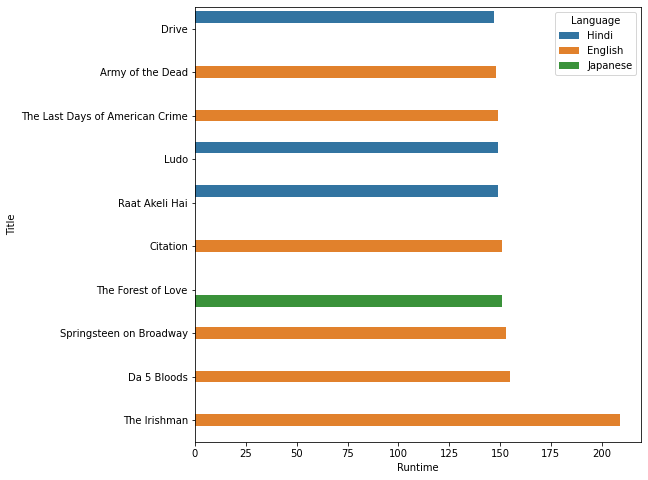

In [7]:
plt.figure(figsize = (8,8))

long_films = data.sort_values(by="Runtime")
data_films = long_films.tail(10)

sns.barplot(x = 'Runtime', y = 'Title', hue ='Language', data = data_films)


## 2) What are the IMDB ratings of movies shot in the 'Documentary' genre between January 2019 and June 2020?


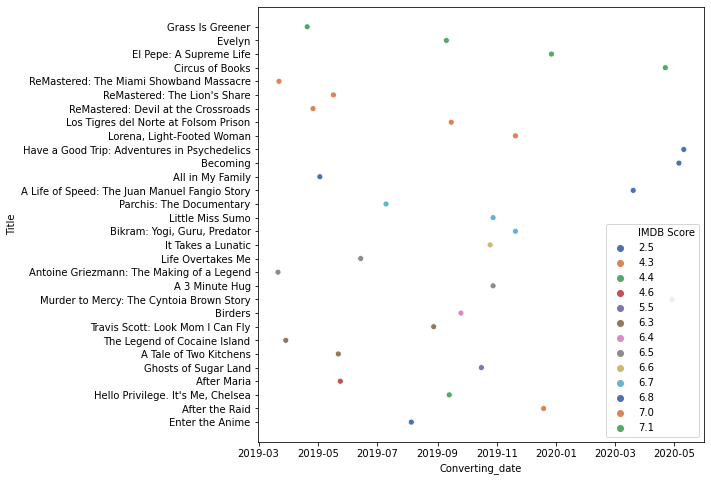

In [110]:
plt.figure(figsize = (8,8))

df = data.head(584)

df["Converting_date"] = pd.to_datetime(df["Premiere"])

condition = df.query('(Genre == "Documentary") & (Converting_date > "2019-01-01" ) & (Converting_date < "2020-06-01" )')
condition_view = condition.head(30)
sns.scatterplot(data = condition_view, x = 'Converting_date', y = 'Title', hue ='IMDB Score',  palette="deep")

## 3) Which genre has the highest IMDB rating among movies shot in English?

In [10]:
english_top_imdb = data[data['Language']=="English"][['Genre','IMDB Score']].max()
english_top_imdb


Genre         Zombie/Heist
IMDB Score               9
dtype: object


## 4) What is the average 'runtime' of movies shot in 'Hindi'?

In [11]:
mean_runtime_hindi = data[data['Language']=="Hindi"][['Runtime']].mean()
mean_runtime_hindi

Runtime    115.787879
dtype: float64


## 5) How many categories does the 'Genre' Column have and what are those categories?


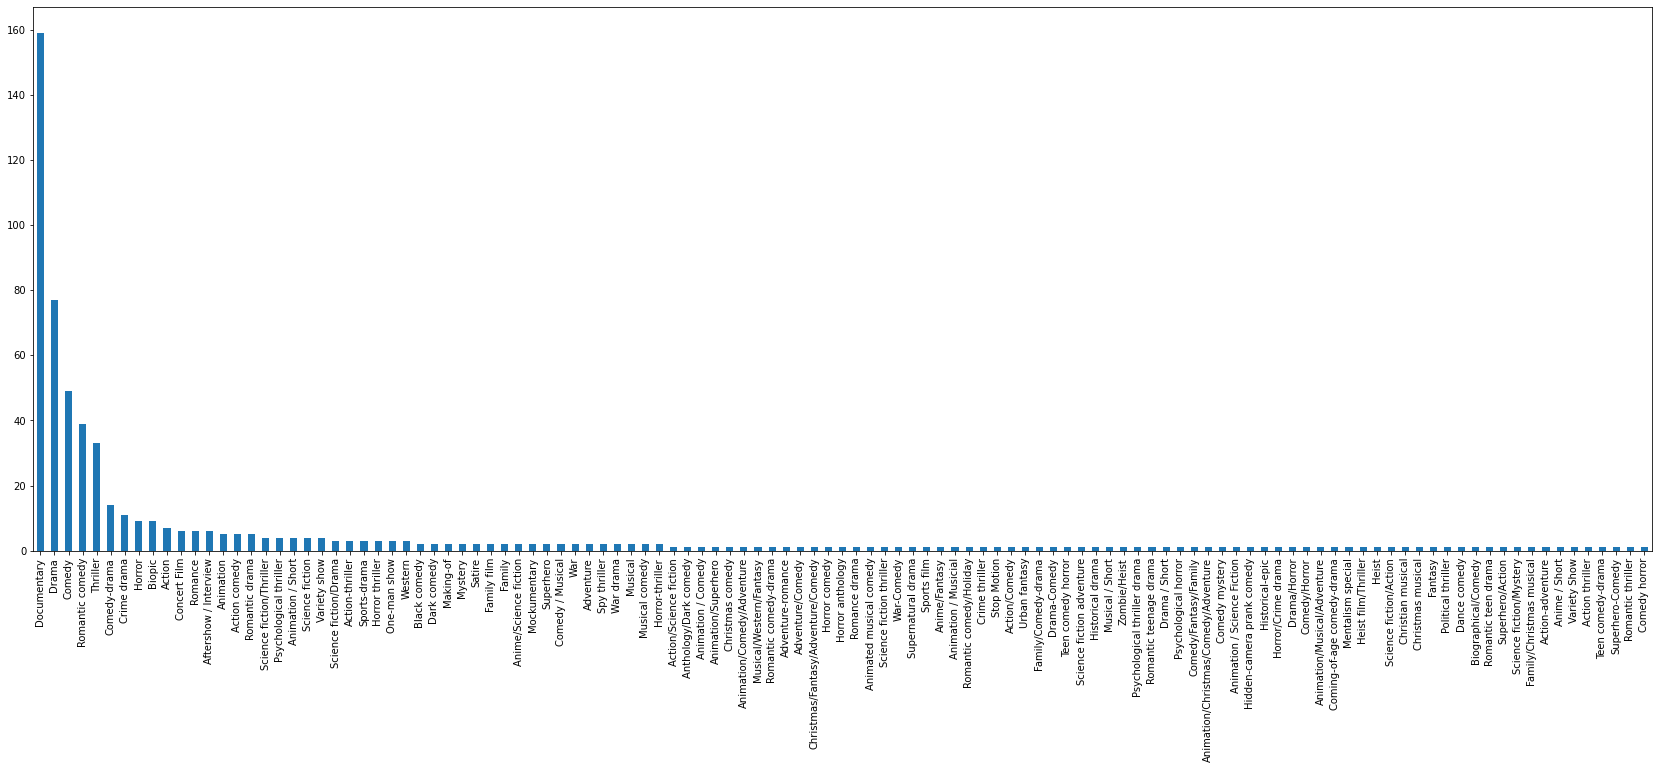

In [12]:
plt.figure(figsize = (29,10))
data.Genre.value_counts().plot(kind='bar')



## 6) What are the 3 most used languages in the movies in the dataset?

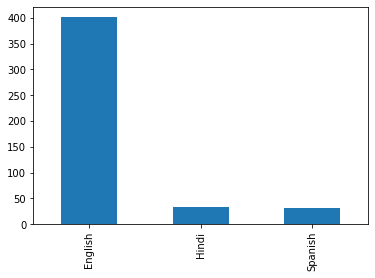

In [13]:
languages = data['Language'].value_counts()[0:3]
languages.plot(kind='bar')


## 7) What are the top 10 movies with the highest IMDB rating?

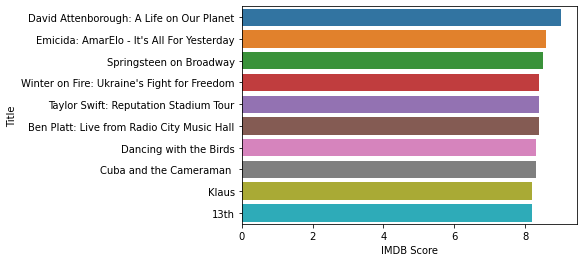

In [14]:
imdb_top10 = data.sort_values(['IMDB Score'], ascending = False)[0:10]
sns.barplot(data = imdb_top10, x= 'IMDB Score', y='Title')


## 8) What is the correlation between IMDB score and 'Runtime'?

** r: -0.04089629142078867. There is no correlation between IMDB Scores and Runtimes! ** 


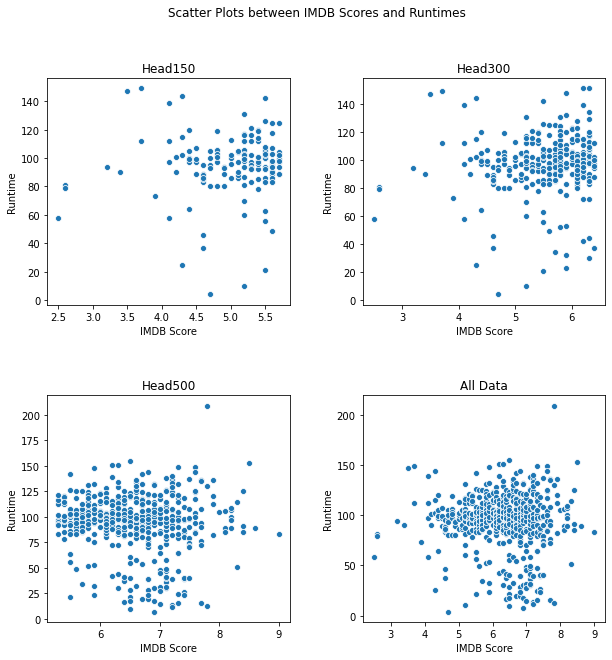

In [16]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (10,10))
fig.suptitle('Scatter Plots between IMDB Scores and Runtimes')

head150=data[['Runtime','IMDB Score']].head(150)
head300=data[['Runtime','IMDB Score']].head(300)
head500=data[['Runtime','IMDB Score']].tail(500)
all_data=data[['Runtime','IMDB Score']]

sns.scatterplot(data=head150, x='IMDB Score', y='Runtime', ax=ax1)
ax1.set_title("Head150")
sns.scatterplot(data=head300, x='IMDB Score', y='Runtime', ax=ax2)
ax2.set_title("Head300")
sns.scatterplot(data=head500, x='IMDB Score', y='Runtime', ax=ax3)
ax3.set_title("Head500")
sns.scatterplot(data=all_data, x='IMDB Score', y='Runtime', ax=ax4)
ax4.set_title("All Data")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)


print(f'** r: {df["IMDB Score"].corr(df["Runtime"])}. There is no correlation between IMDB Scores and Runtimes! ** ')



## 9) Which are the top 10 'Genre' with the highest IMDB Score?


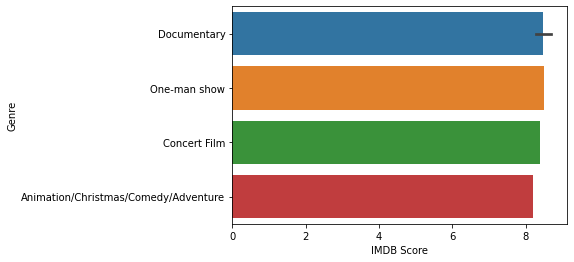

In [17]:
genre_top10 = data.sort_values("IMDB Score", ascending = False)[['Genre', 'IMDB Score']][0:10]
sns.barplot(data=genre_top10, x = 'IMDB Score', y = 'Genre')


## 10) What are the top 10 movies with the highest 'runtime'?


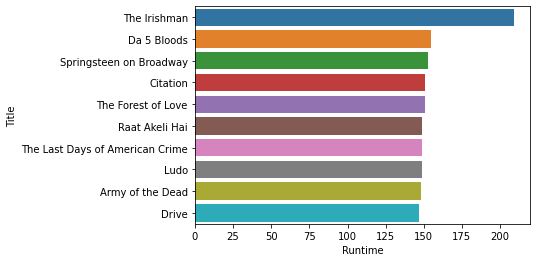

In [18]:
runtime_top10 = data.sort_values("Runtime", ascending = False)[['Title', 'Runtime']][0:10]
sns.barplot(data=runtime_top10, x = 'Runtime', y = 'Title')


## 11) In which year was the most movies released?


** Most movies released in 2020 **


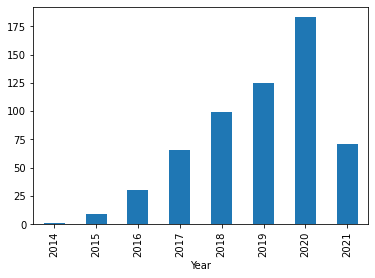

In [119]:
for col in range(0,len(df)):
    df["Year"][col] = df.iloc[col,2].split(" ")[-1].strip()
print("** Most movies released in 2020 **")
df.groupby("Year")["Title"].count().plot(kind="bar")
plt.show()


## 12) Which language movies have the lowest average IMBD ratings?


Malay language has lowest imdb ratings: 4.2


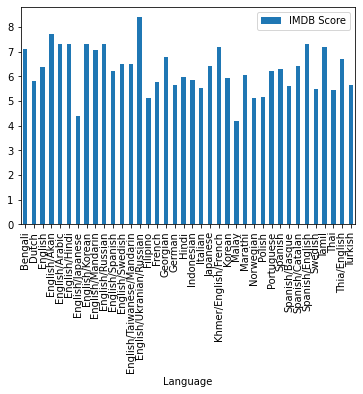

In [167]:
sum_runtime = df.groupby("Language").agg({"IMDB Score" : "mean"})
sum_runtime.plot(kind="bar")
min_score = sum_runtime["IMDB Score"].min()
print(f"Malay language has lowest imdb ratings: {min_score}")


## 13) Which year has the greatest total runtime?

** The total runtime of the movies released in 2020 is the highest **


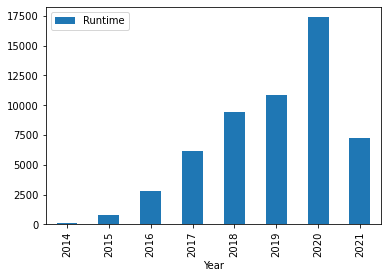

In [139]:
sum_runtime = df.groupby("Year").agg({"Runtime" : "sum"})
print("** The total runtime of the movies released in 2020 is the highest **")
sum_runtime.plot(kind="bar")


## 14) What is the "Genre" where each language is used the most?

In [170]:
language = data.sort_values('Language')[['Genre','Language']]
print("** Documentary genre used the most **")
language.describe()

** Documentary genre used the most **


,Genre,Language
count,584,584
unique,115,38
top,Documentary,English
freq,159,401


## 15) Is there any outlier data in the data set?
### Outliers of IMDB Score

outlier_count: 9


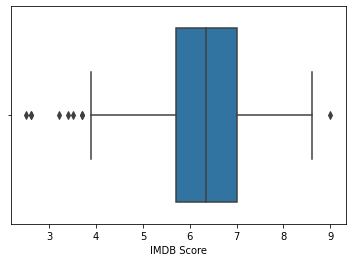

In [63]:
# interquartile range will be used
imdb_q1 = df["IMDB Score"].quantile(0.25) #first quartile
imdb_q3 = df["IMDB Score"].quantile(0.75) #third quartile

imdb_iqr = imdb_q3-imdb_q1

imdb_up = imdb_q3 + 1.5 * imdb_iqr #upper limit
imdb_low = imdb_q1 - 1.5 * imdb_iqr #lower limit

outlier_imdb = df[(df["IMDB Score"] < low) | (df["IMDB Score"] > up)]

print(f"imdb_outlier_count: {outlier_imdb.count()[1]}")

sns.boxplot(x = df['IMDB Score'])
plt.show()

### Outliers of Runtime

 runtime_outlier_count: 75 


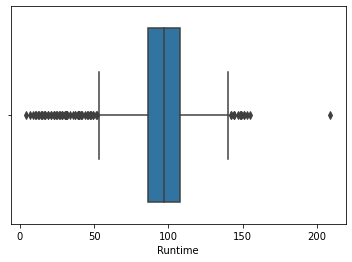

In [64]:
q1_runtime = df["Runtime"].quantile(0.25)
q3_runtime = df["Runtime"].quantile(0.75)

iqr_runtime = q3_runtime - q1_runtime

up_runtime = q3_runtime + 1.5 * iqr_runtime
low_runtime = q1_runtime - 1.5 *iqr_runtime

outlier_runtime = df[(df["Runtime"] < low_runtime) | (df["Runtime"] > up_runtime)]
runtime_count = outlier_runtime.count()["Runtime"]

print(f" runtime_outlier_count: {runtime_count} ")

sns.boxplot(x = df['Runtime'])
plt.show()